In [58]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statistics as st
%matplotlib inline


x = [0.36, 0.56, 0.76, 0.21, 0.44, 0.60, 0.82, 1.12, 1.56]
y = [17, 64, 62, 9, 32, 71, 93, 118, 163]

n = len(x)

In [64]:
xy = np.array([x, y])
xy.sort(axis=1)

slope, intercept = np.polyfit(xy[0], xy[1], 1)
print('slope =', slope, 'intercept =', intercept)

yr = intercept + slope * xy[0]

slope = 117.3154060905561 intercept = -13.926451240252858


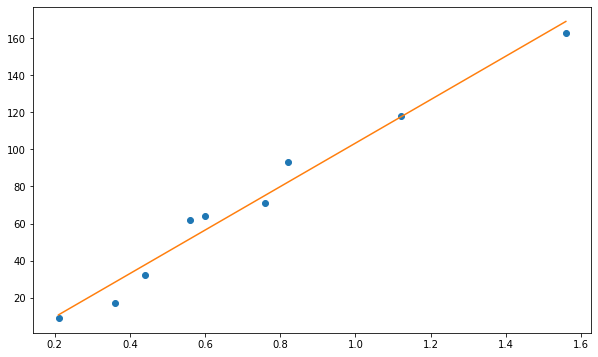

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(xy[0], xy[1], 'o')
ax.plot(xy[0], yr)

plt.show()

In [76]:
xmean = st.mean(xy[0])
ymean = st.mean(xy[1])
print('xmean =', xmean, 'ymean =', ymean)

β1 = 0.95
ɑ1 = 1 - β1
t = stats.t.ppf(1 - ɑ1 / 2, n - 2)
print('ɑ1 =', ɑ1, 't =', t)

D1 = 1 / (n - 2) * sum([ (xy[1][i] - yr[i]) ** 2 for i in range(n)])
print('D1 =', D1)

intercept_left = intercept - t * (D1 / (n - 2)) ** 0.5
intercept_right = intercept + t * (D1 / (n - 2)) ** 0.5
print(
	'intercept_left =', intercept_left,
	'intercept_right =', intercept_right
)

Ɛ_slope = (
	n / (n - 2) *
	D1 / sum([ (xy[0][i] - xmean) ** 2 for i in range(n) ])
) ** 0.5
print('Ɛ_slope =', Ɛ_slope)

slope_left = slope - t * Ɛ_slope
slope_right = slope + t * Ɛ_slope
print(
	'slope_left =', slope_left,
	'slope_right =', slope_right
)

xmean = 0.7144444444444444 ymean = 69.88888888888889
ɑ1 = 0.050000000000000044 t = 2.3646242510102993
D1 = 70.70861507006944
intercept_left = -21.44180251615618 intercept_right = -6.411099964349537
Ɛ_slope = 8.101772230270528
slope_left = 98.15775899869661 slope_right = 136.47305318241558


In [75]:
print(f'intercept ∈ ({intercept_left}; {intercept_right})')
print(f'slope ∈ ({slope_left}; {slope_right})')
print(f'with {β1 * 100}%')

intercept ∈ (-21.44180251615618; -6.411099964349537)
slope ∈ (98.15775899869661; 136.47305318241558)
with 95.0%


In [85]:
Ɛy = xy[1] - yr
yleft = yr - t * (
	D1 / (n - 2) *
	(
		1 +
		n * (xy[0] - xmean) ** 2 /
		sum([ (xy[0][i] - xmean) ** 2 for i in range(n) ])
	)
) ** 0.5
yright = yr + t * (
	D1 / (n - 2) *
	(
		1 +
		n * (xy[0] - xmean) ** 2 /
		sum([ (xy[0][i] - xmean) ** 2 for i in range(n) ])
	)
) ** 0.5

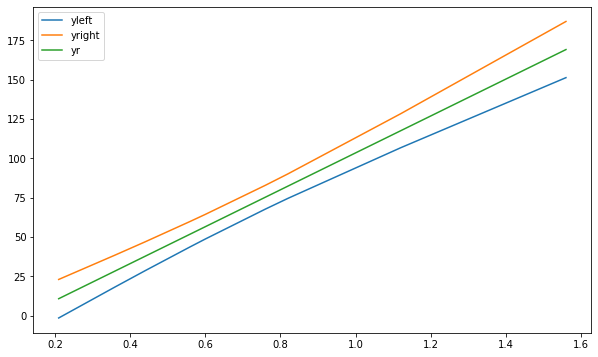

In [90]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(xy[0], yleft, label='yleft')
ax.plot(xy[0], yright, label='yright')
ax.plot(xy[0], yr, label='yr')

plt.legend()
plt.show()

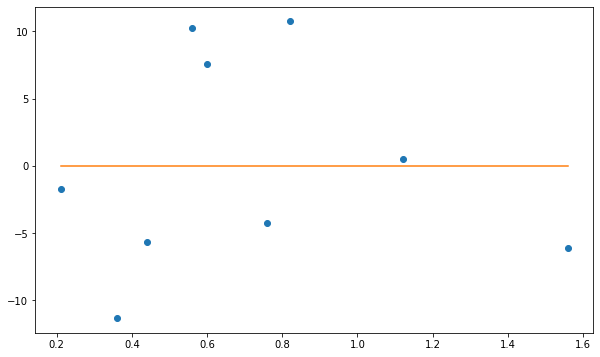

In [98]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(xy[0], Ɛy, 'o')
ax.plot(xy[0], xy[0] * 0)

plt.show()